# Support Vector Machines

Support Vector Machines of SVM is een supervised machine learning techniek die heel populair is omdat het het kan omgaan met heel veel features en weinig data en toch goede resultaten bekomen.
Ook in het geval van heel veel data heeft deze techniek voordelen, namelijk omdat ze heel geheugenefficient is omdat er maar een beperkt deel van de data gebruikt wordt voor het model te trainen.
Deze techniek kan gebruikt worden voor regressie toe te passen maar is veel populairder als classifier.
SVM als classifier is een **binaire classificatie** techniek maar kan omgaan met multi-class problemen door gebruik te maken van de One-Vs-All of One-Vs-One methoden. Standaard wordt er One-vs-One gebruikt voor multi-class toepassingen

## Werking

Op basis van de trainingsexamples wordt gezocht naar een zo goed mogelijke **lineaire** scheiding van de trainingsexamples.
Hierbij wordt de marge tot de dichtste punten van de verschillende klassen zo groot mogelijk gemaakt. 
Bij het plaatsen van de beste lineaire scheiding worden enkel de punten die het dichtst bij de scheiding liggen gebruikt.
Deze observaties worden de **support vectors** gebruikt en enkel deze punten worden gebruikt omdat verder gelegen punten geen informatie bevatten over de scheidingslijn. 




In [4]:
import sklearn.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
def visualise_decision_boundary(x, y, model, levels=True, color='green'):
    # Visualiseer de decision boundary (gaat enkel werken bij 2 features)

    h = 0.01
    x_min = x.min()
    x_max = x.max()
    y_min = y.min()
    y_max = y.max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    if levels:
        xy = np.vstack([xx.ravel(), yy.ravel()]).T
        predicts = model.decision_function(xy).reshape(xx.shape)
        plt.contour(xx, yy, predicts, colors=color, levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    else:
        predicts = model.predict(np.c_[xx.ravel(), yy.ravel()])
        predicts = predicts.reshape(xx.shape)
        plt.contour(xx, yy, predicts, colors=color)

<Axes: >

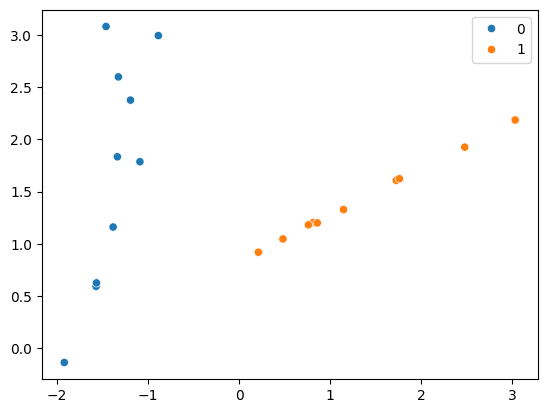

In [6]:
X, y = datasets.make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep = 1.5, random_state=98765)

sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

Wat is nu de beste scheidingslijn die we kunnen tekenen hier?

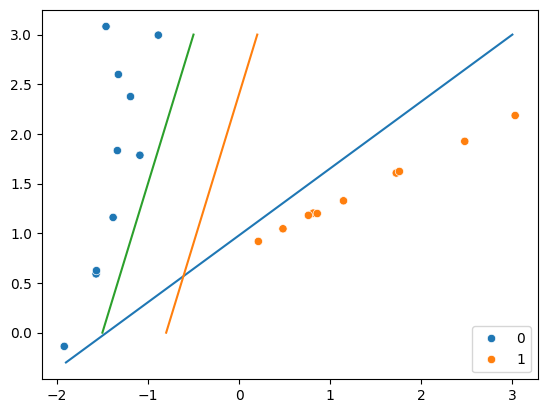

In [7]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)
plt.plot([-1.9, 3], [-0.3,3])
plt.plot([-0.8, 0.2], [0,3])
plt.plot([-1.5, -0.5], [0,3])

Intuitief kiezen we de lijn met de grootste marge als beste lijn.
Deze marge maximaliseren is net hetgene dat er gebeurd bij SVM. 
In het voorbeeld hieronder wordt de lijn getekend die SVM uitkomt voor deze dataset.

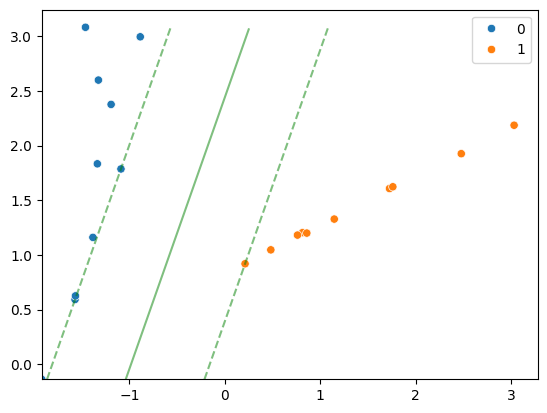

In [8]:
model = SVC(kernel='linear')
model.fit(X, y)

sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)
visualise_decision_boundary(X[:,0], X[:, 1], model)

## Verschil met logistische regressie

SVM gaat de marge tussen de scheidingslijn en de support vectors gaan maximaliseren.
Dit werkt anders dan het minimaliseren van de kost-functie waar we kunnen naar de fout van alle punten.
Dit kan zorgen voor een andere gewichten.
Ook zijn er nog de volgende verschillen:
* Logistische regressie werkt goed voor onafhankelijke variabelen en SVM werkt op semi- of ongestructureerde data zoals tekst of beelden.
* SVM maakt gebruik van geometrische informatie tussen de verschillende datapunten terwijl logistische regressie eerder gebruik maakt van statistische eigenschappen.
* SVM heeft een lagere kans op overfitting dan logistische regressie
* SVM is gevoeliger voor outliers dan logistische regressie
* SVM geeft geen indicatie over de zekerheid waarmee een observatie tot een klasse behoort

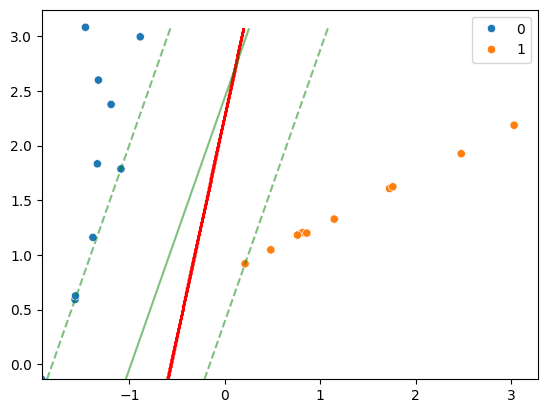

In [9]:
modelLR = LogisticRegression()
modelLR.fit(X, y)

sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)
visualise_decision_boundary(X[:,0], X[:, 1], modelLR, levels=False, color='red')
visualise_decision_boundary(X[:,0], X[:, 1], model)

### Wat als strikt lineaire scheiding niet mogelijk is?

In veel situaties kunnen de observaties niet altijd 100% gesplitst worden in twee klassen en zal er een zone zijn waar er overlap mogelijk is tussen de klassen.
Om dan nog steeds met SVM te werken kunnen we gebruik maken van de regularisatie-parameter **C**.
Deze verzacht de constraint van strikte splitsing en laat overlap van de klassen toe. 
De betekenis van deze C-parameter is:
* Grote C zorgt ervoor dat er een kleine toegelaten marge is waarin naar support vectors gezocht wordt. Een grotere waarde verhoogt de kans op overfitting.
* Lagere C waarde laat een grotere marge toe en dus worden er meer support vectors gekozen. Dit kan leiden tot underfitting omdat er te veel vectors een impact hebben op het eindresultaat.

Kans opvragen waarmee het tot een klasse hoort gaat niet.

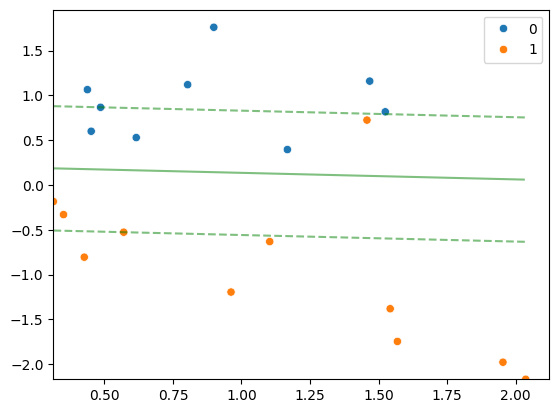

In [10]:
X, y = datasets.make_classification(n_samples=20, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep = 1, random_state=1111)
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

model = SVC(kernel='linear')
model.fit(X, y)

visualise_decision_boundary(X[:,0], X[:, 1], model)

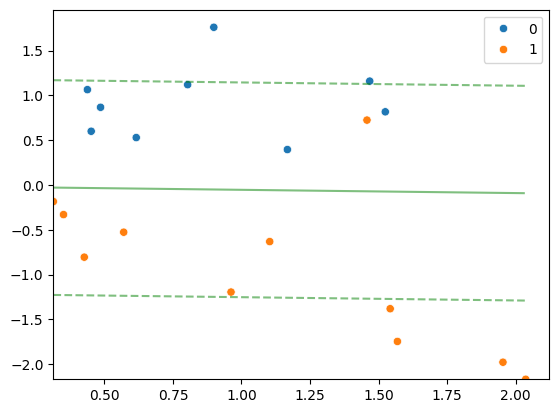

In [11]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

visualise_decision_boundary(X[:,0], X[:, 1], model)

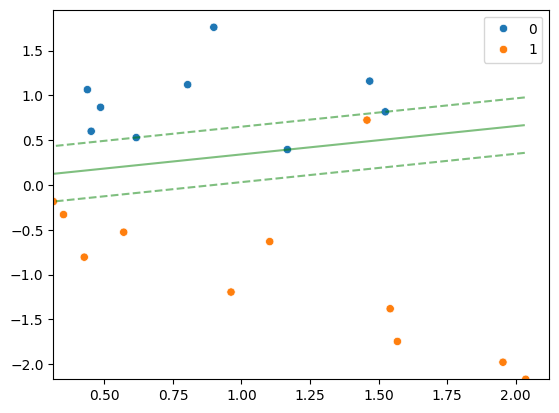

In [13]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

model = SVC(kernel='linear', C=10000) # de C parameter is de hyperparameter in svm-technieken om overfitting tegen te gaan
model.fit(X, y)

visualise_decision_boundary(X[:,0], X[:, 1], model)

## Wat als de datapunten totaal niet lineair scheidbaar zijn?

Hoe zou je onderstaande dataset splitsen?

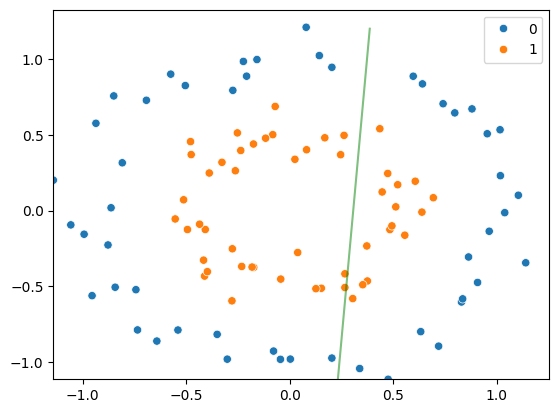

In [14]:
X, y = datasets.make_circles(noise=0.1, random_state=1111, factor=0.5)
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

model = SVC(kernel='linear')
model.fit(X, y)

visualise_decision_boundary(X[:,0], X[:, 1], model)

Het is duidelijk dat er geen enkele rechte te tekenen is op deze scatter plot die de datapunten in twee deelt.
Bij logistische regressie hebben we om dit probleem op te lossen hogere-orde features toegevoegd.
Dit kunnen we echter niet doen bij SVM.
Om dit probleem op te lossen moeten we hier onze datapunten projecteren naar een hogere dimensie.
Een visualisatie van hoe dit werkt kan je vinden in [deze video](https://www.youtube.com/watch?v=3liCbRZPrZA).
Een voorbeeld van hoe je dit kan doen in het bovenstaande is om de afstand tot de oorsprong te berekenen van elk punt.
Hierdoor gaan in deze extra derde dimensie/feature alle blauwe waarden een grotere afstand hebben.
Op basis van deze extra dimensie kan dan een vlak getekend worden dat een lineaire scheiding verzorgd tussen de twee klassen.
De functie die deze projectie verzorgt naar een hogere dimensie wordt ook een **kernel** genoemd.
Een heel aantal functies kan gebruikt worden als kernel maar de meest gebruikte zijn:
* Lineaire kernel (geen hogere dimensies gebruikt)
* Gaussiaanse kernel of Radial Basis function (RBF), dit is de default waarde bij sklearn.svm. Bij gebruik van deze kernel moet je er voor zorgen dat eerst normalisatie toegepast wordt.
* Polynomial kernel (Vooral populair bij Natural Language Processing applicaties en beperkt tot graad 2 omdat er anders eens sterke neiging is tot overfitting)

Indien er een niet-lineaire kernel gebruikt wordt, wordt er ook een extra hyperparameter geintroduceerd.
Deze parameter wordt $\gamma$ genoemd en geeft de breedte van de kernel weer of hoe snel de extra dimensie varieert voor aanpassingen van de features.
Algemeen gezien kan je stellen dat:
* Kleine gamma leidt tot brede / traag variërende kernel wat tot underfitting kan leiden indien de gamma te klein is
* Grote gamma leidt tot snel variërende kernels wat kan leiden tot overfitting. 

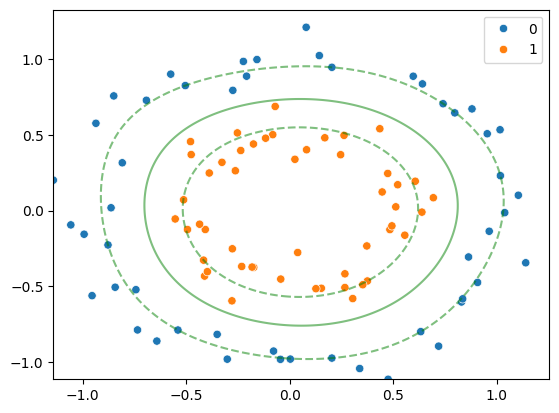

In [15]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

model = SVC(kernel='rbf')
model.fit(X, y)

visualise_decision_boundary(X[:,0], X[:, 1], model)

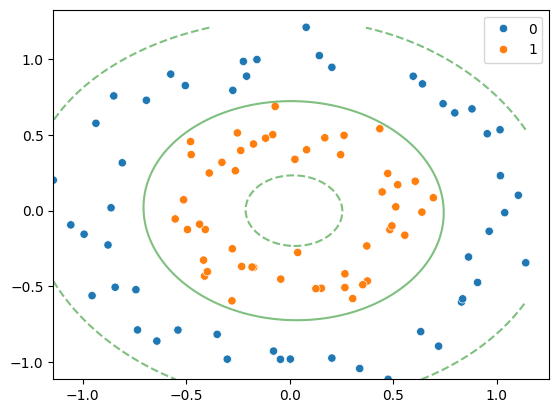

In [20]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=y)

model = SVC(kernel='rbf', gamma=1, C=0.1)
model.fit(X, y)

visualise_decision_boundary(X[:,0], X[:, 1], model)

### Wanneer welke classifier kiezen

* Aantal features groot tov aantal examples -> SVM met lineaire kernel of logistic regression 
* Klein aantal features en redelijk aantal examples -> SVM met gaussian kernel 
* Klein aantal features en heel veel examples -> Logistic Regression met hogere-orde features of SVM met lineaire kernel

### Evaluatie van de SVM-model

De evaluatie van het resulterende model kan berekend worden net zoals bij logistische regressie, namelijk door gebruik te maken van F1-score per klasse of de Micro/Macro/Weighted F1-score voor een globaal resultaat.
Ook is de accuraatheid steeds een goed begin.

### Oefening:

Gebaseerd op de [iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris) dataset, maak een SVM en Logistic Regression classifier en zoek naar de classifier met de hoogste accuraatheid.

* Geef een histogram, boxplot en correlatie matrix van de features in de dataset
* Verdeel de data in trainings- en testdata
* Train de modellen
* Evalueer de classifiers door de verschillende metrieken te berekenen per klasse en globaal